In [ ]:
from tensorflow import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import tensorflow as tf
from tensorflow import keras
import seaborn as sn
from sklearn.manifold import TSNE
from tensorflow.keras.layers import Add, Input, Conv2D, BatchNormalization, Activation, AveragePooling2D, Flatten, Dense
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD
import sklearn.metrics as metrics
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
print(tf.test.gpu_device_name())


/device:GPU:0


In [ ]:
# Load in the data
cifar100 = tf.keras.datasets.cifar100

# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(type(x_train))
print(type(y_train))
print("X train shape: ",x_train.shape,
      "Y train shape: ", y_train.shape,
      "\nX test shape: ",x_test.shape,
      "Y test shape:",y_test.shape)

169001437/169001437 [==============================] - 6s 0us/step
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
X train shape:  (50000, 32, 32, 3) Y train shape:  (50000, 1) 
X test shape:  (10000, 32, 32, 3) Y test shape: (10000, 1)


In [ ]:
# Normalize the data between 1 and 0 (MINMAX scaling)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert the labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 100)
y_test = tf.keras.utils.to_categorical(y_test, 100)

In [ ]:
# Reshape

# Reshape X_train and X_test
x_trainR = np.reshape(x_train, (50000, 3072))

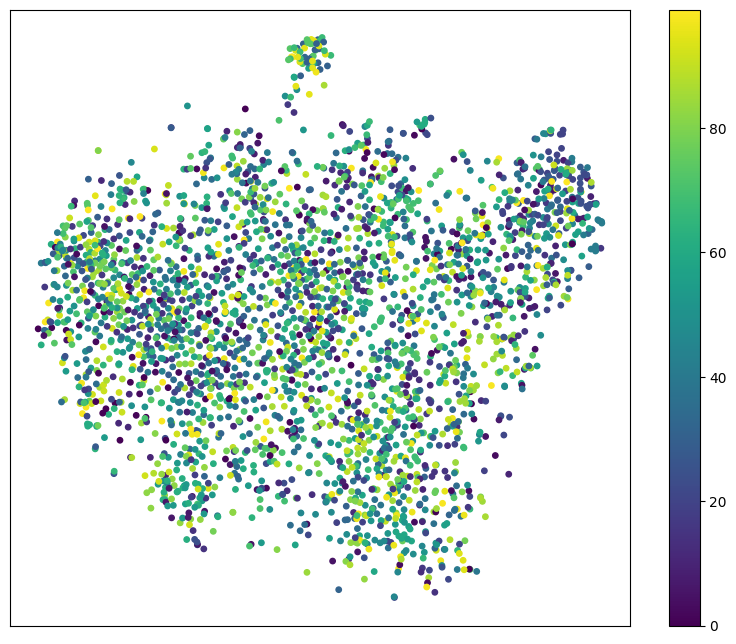

In [ ]:
#DO NOT RUN AGAIN UNLESS YOU WANT TO CHANGE PARAMETERS

tsne= TSNE()

VisTrain= tsne.fit_transform(x_trainR[:3000])

plt.figure(figsize=(10, 8))
plt.scatter(VisTrain[:,0], VisTrain[:,1], c=y_train[:3000], s=15)

plt.xticks([])
plt.yticks([])
plt.colorbar();

In [ ]:
# Define data augmentation pipeline
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

# Fit the data augmentation pipeline on the original data
datagen.fit(x_train)

In [ ]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense

## **MY Model**

In [ ]:
# Define a function for the learning rate schedule
def lr_schedule(epoch):
    lr = 0.01
    if epoch > 25:
        lr = 0.001
    if epoch > 33:
        lr = 0.0001
    if epoch > 40:
        lr = 0.00001
    if epoch > 45:
        lr = 0.000001
    return lr

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=x_train.shape[1:]),
    BatchNormalization(),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.125),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    #MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    Conv2D(256, (3, 3), activation='relu', padding='same'),
    BatchNormalization(),
    #MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),

    Dense(100, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_2 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_3 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                        

In [ ]:
#defining the optimizer with its lr and momentum GD
sgd= SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

# Define the learning rate schedule callback
lr_scheduler= LearningRateScheduler(lr_schedule)

# Train the model
history= model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64,
                   callbacks=[lr_scheduler])
#history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
#                  steps_per_epoch=x_train.shape[0] // 64,
#                  epochs=50,
#                  validation_data=(x_test, y_test),callbacks=[lr_scheduler])

Epoch 1/50
782/782 [==============================] - 19s 19ms/step - loss: 1.8722 - accuracy: 0.5004 - val_loss: 4.2474 - val_accuracy: 0.1988 - lr: 0.0100
Epoch 2/50
782/782 [==============================] - 15s 19ms/step - loss: 1.5331 - accuracy: 0.5728 - val_loss: 1.7201 - val_accuracy: 0.5392 - lr: 0.0100
Epoch 3/50
782/782 [==============================] - 15s 19ms/step - loss: 1.3801 - accuracy: 0.6101 - val_loss: 1.6444 - val_accuracy: 0.5643 - lr: 0.0100
Epoch 4/50
782/782 [==============================] - 14s 18ms/step - loss: 1.2530 - accuracy: 0.6394 - val_loss: 1.7034 - val_accuracy: 0.5524 - lr: 0.0100
Epoch 5/50
782/782 [==============================] - 14s 18ms/step - loss: 1.1315 - accuracy: 0.6678 - val_loss: 1.6502 - val_accuracy: 0.5628 - lr: 0.0100
Epoch 6/50
782/782 [==============================] - 14s 18ms/step - loss: 1.0148 - accuracy: 0.7010 - val_loss: 1.6877 - val_accuracy: 0.5677 - lr: 0.0100
Epoch 7/50
782/782 [==============================] - 14s 

In [ ]:
#use metrics to print accuracy and f1 score
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

accuracy = metrics.accuracy_score(y_true, y_pred)
f1_score = metrics.f1_score(y_true, y_pred, average='macro')

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Accuracy:', accuracy)
print('F1 score:', f1_score)

313/313 - 1s - loss: 2.1592 - accuracy: 0.5904 - 1s/epoch - 4ms/step
313/313 [==============================] - 1s 3ms/step
Test loss: 2.1592061519622803
Test accuracy: 0.590399980545044
Accuracy: 0.5904
F1 score: 0.5873827094865388


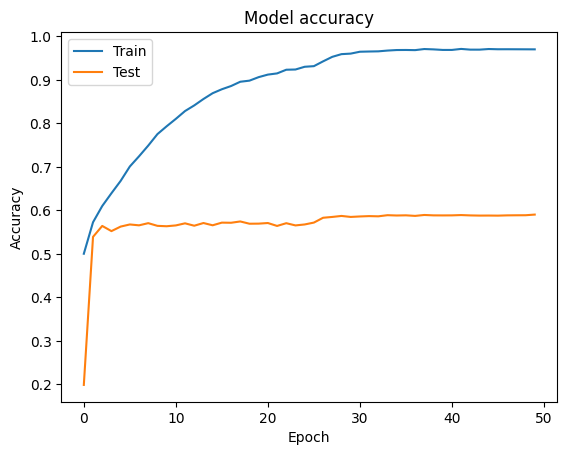

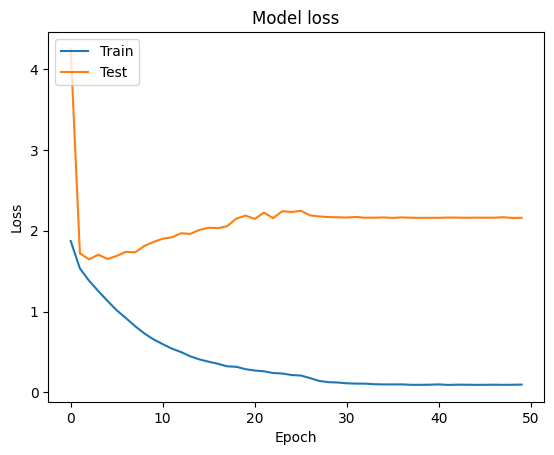

In [ ]:
#visualosing accuracy and loss

#training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

#training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import pickle
# save the model
with open('model_58acc.pkl', 'wb') as f:
    pickle.dump(model, f)


In [ ]:
from google.colab import files
files.download('model_58acc.pkl')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## VGG19 MODEL

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19 # VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input

In [ ]:
# Load the VGG19 model
vgg = VGG19(input_shape=(32, 32, 3), weights='imagenet', include_top=False)

# Freeze the pre-trained layers
for layer in vgg.layers:
    layer.trainable = True

# Add custom layers on top of the pre-trained model
x = Flatten()(vgg.output)
x = Dense(512, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)

# Create a new model with custom layers on top of VGG19
VG = Model(inputs=vgg.input, outputs=predictions)
#VG.summary()

In [ ]:
# Compile the model
VG.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history= VG.fit(x_train, y_train, epochs=150, validation_data=(x_test, y_test), batch_size=64)


Epoch 1/150
782/782 [==============================] - 58s 52ms/step - loss: 4.6085 - accuracy: 0.0085 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 2/150
782/782 [==============================] - 39s 49ms/step - loss: 4.6057 - accuracy: 0.0087 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 3/150
782/782 [==============================] - 38s 49ms/step - loss: 4.6057 - accuracy: 0.0091 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 4/150
782/782 [==============================] - 38s 49ms/step - loss: 4.6057 - accuracy: 0.0086 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 5/150
782/782 [==============================] - 38s 48ms/step - loss: 4.6057 - accuracy: 0.0088 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 6/150
782/782 [==============================] - 38s 49ms/step - loss: 4.6057 - accuracy: 0.0089 - val_loss: 4.6052 - val_accuracy: 0.0100
Epoch 7/150
782/782 [==============================] - 38s 48ms/step - loss: 4.6057 - accuracy: 0.0089 - val_loss: 4.6052 - val_ac

In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = VG.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

In [ ]:
#use metrics to print accuracy and f1 score
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

y_true = np.argmax(y_test, axis=1)

accuracy = metrics.accuracy_score(y_true, y_pred)
f1_score = metrics.f1_score(y_true, y_pred, average='macro')

print('Test loss:', test_loss)
print('Test accuracy:', test_acc)
print('Accuracy:', accuracy)
print('F1 score:', f1_score)

## Essambling

In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


# create the VGG19 model
base_model = VGG19(include_top=False, input_shape=x_train.shape[1:], weights='imagenet')

# create the top layers for the model
x = base_model.output
x = Flatten()(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)

# create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# freeze the base layers of the model
for layer in base_model.layers:
    layer.trainable = False

# compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# fit the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# create three different classifiers to be used in the ensemble
tree = DecisionTreeClassifier()
logistic = LogisticRegression()
svm = SVC(probability=True)

# fit the classifiers on the training set
tree.fit(x_train.reshape(x_train.shape[0], -1), y_train)
logistic.fit(x_train.reshape(x_train.shape[0], -1), y_train)
svm.fit(x_train.reshape(x_train.shape[0], -1), y_train)

# create an ensemble of the classifiers
ensemble = VotingClassifier([('tree', tree), ('logistic', logistic), ('svm', svm)], voting='soft')

# fit the ensemble on the training set
ensemble.fit(x_train.reshape(x_train.shape[0], -1), y_train)

# predict the classes of the test set using the ensemble
y_pred_ensemble = ensemble.predict(x_test.reshape(x_test.shape[0], -1))

# predict the classes of the test set using the VGG19 model
y_pred_model = model.predict(x_test)
y_pred_model = y_pred_model.argmax(axis=1)

# calculate the accuracy of the ensemble and the model
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
accuracy_model = accuracy_score(y_test.argmax(axis=1), y_pred_model)

print(f"Accuracy of ensemble: {accuracy_ensemble}")
print(f"Accuracy of model: {accuracy_model}")


Epoch 1/10
1563/1563 [==============================] - 24s 13ms/step - loss: 3.6382 - accuracy: 0.1500 - val_loss: 3.1184 - val_accuracy: 0.2398
Epoch 2/10
1563/1563 [==============================] - 23s 15ms/step - loss: 3.2452 - accuracy: 0.2143 - val_loss: 2.9986 - val_accuracy: 0.2645
Epoch 3/10
1563/1563 [==============================] - 23s 14ms/step - loss: 3.1487 - accuracy: 0.2305 - val_loss: 2.9462 - val_accuracy: 0.2783
Epoch 4/10
1563/1563 [==============================] - 20s 13ms/step - loss: 3.0878 - accuracy: 0.2397 - val_loss: 2.9055 - val_accuracy: 0.2846
Epoch 5/10
1563/1563 [==============================] - 22s 14ms/step - loss: 3.0444 - accuracy: 0.2483 - val_loss: 2.8763 - val_accuracy: 0.2894
Epoch 6/10
1563/1563 [==============================] - 23s 14ms/step - loss: 3.0122 - accuracy: 0.2538 - val_loss: 2.8573 - val_accuracy: 0.2940
Epoch 7/10
1563/1563 [==============================] - 22s 14ms/step - loss: 2.9831 - accuracy: 0.2605 - val_loss: 2.8375 -

## RESNET 50

In [ ]:
# Define ResNet50 model
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(32, 32, 3))
#base_model.summary()

In [ ]:
# Freeze all layers in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add new classifier layers on top of the base model
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
x = Dense(512, activation='relu')(x)
predictions = Dense(100, activation='softmax')(x)

# Define the new model
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with Stochastic Gradient Descent optimizer
opt = SGD(lr=0.1, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Train the model with augmented data and original data
batch_size = 128
epochs = 50

steps_per_epoch = int(np.ceil(len(x_train) / batch_size))
history = model.fit(datagen_train.flow(x_train, y_train, batch_size=batch_size),
                    steps_per_epoch=steps_per_epoch,
                    epochs=epochs,
                    validation_data=(x_test, y_test))

Epoch 1/50
182/391 [============>.................] - ETA: 18s - loss: 4.6281 - accuracy: 0.0092

KeyboardInterrupt: ignored